In [46]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'serif'
% matplotlib inline
import math, time
import itertools
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import torch
import torch.nn as nn
from torch.autograd import Variable

UsageError: Line magic function `%` not found.


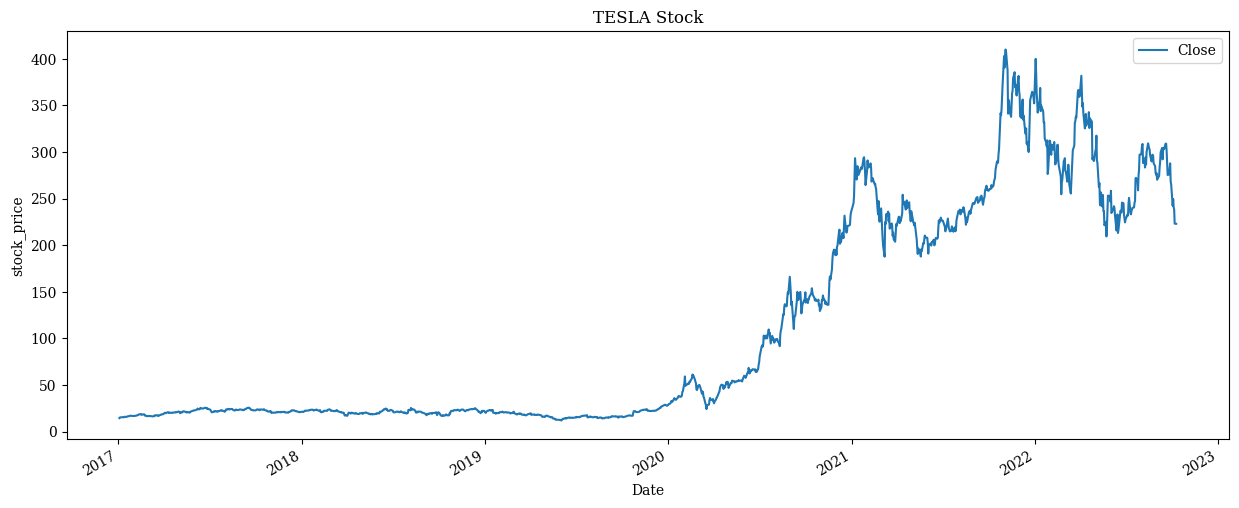

In [47]:
df = pd.read_feather('./stock_data/input/TSLA.ftr')
df[['Close']].plot(figsize=(15, 6))
plt.ylabel("stock_price")
plt.title("TESLA Stock")
plt.show()

In [48]:
df_tsla = pd.read_feather('./stock_data/input/TSLA.ftr')
df_tsla = df_tsla.fillna(method='ffill')

scaler = MinMaxScaler(feature_range=(-1, 1))
df_tsla['Close'] = scaler.fit_transform(df_tsla['Close'].values.reshape(-1, 1))
df_tsla= df_tsla['Close']
print(df_tsla[1:3])
def load_data(stock, look_back):
    data_raw = stock.values  # convert to numpy array
    data = []
    # create all possible sequences of length look_back
    for index in range(len(data_raw) - look_back):
        data.append(data_raw[index: index + look_back])
    data = np.array(data)
    test_set_size = int(np.round(0.2 * data.shape[0]))
    train_set_size = data.shape[0] - (test_set_size)
    x_train = data[:train_set_size, :-1, :]
    y_train = data[:train_set_size, -1, :]
    x_test = data[train_set_size:, :-1]
    y_test = data[train_set_size:, -1, :]
    return [x_train, y_train, x_test, y_test]


look_back = 60  # choose sequence length
x_train, y_train, x_test, y_test = load_data(df_tsla, look_back)
print('x_train.shape = ', x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ', y_test.shape)
# print(x_train)

1   -0.983914
2   -0.983995
Name: Close, dtype: float64


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [ ]:
# make training and test sets in torch
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)